# **Importing the Necessary Libraries**

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import skimage


import warnings
warnings.filterwarnings('ignore')

# **Exploring the Dataset**

In [5]:
# The Path of the dataset
train_data_path = 'D:/New Plant Diseases Dataset(Augmented)/train/'

# Determine the Categories of the dataset
categories = os.listdir(train_data_path)
print(f'The Number Of categories are : {len(categories)} Category')

The Number Of categories are : 38 Category


In [6]:
# Explore the number of images at each Catgory
cat_freq = {}
for cat in categories:
    cat_freq[cat] = len(os.listdir(train_data_path + cat))

# Create A dataframe 
cat_freq_df = pd.DataFrame.from_dict(cat_freq, orient='index', columns=['Frequencies'])

# Rename the index column to "Categories"
cat_freq_df.reset_index(inplace=True)
cat_freq_df.columns = ['Categories', 'Frequencies']
cat_freq_df

Categories  Frequencies
0                                  Apple___Apple_scab         2016
1                                   Apple___Black_rot         1987
2                            Apple___Cedar_apple_rust         1760
3                                     Apple___healthy         2008
4                                 Blueberry___healthy         1816
5                   Cherry_(including_sour)___healthy         1826
6            Cherry_(including_sour)___Powdery_mildew         1683
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...         1642
8                         Corn_(maize)___Common_rust_         1907
9                              Corn_(maize)___healthy         1859
10                Corn_(maize)___Northern_Leaf_Blight         1908
11                                  Grape___Black_rot         1888
12                       Grape___Esca_(Black_Measles)         1920
13                                    Grape___healthy         1692
14         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)         1722
15           Orange___Haunglongbing_(Citrus_greening)         2010
16                             Peach___Bacterial_spot         1838
17                                    Peach___healthy         1728
18                      Pepper,_bell___Bacterial_spot         1913
19                             Pepper,_bell___healthy         1988
20                              Potato___Early_blight         1939
21                                   Potato___healthy         1824
22                               Potato___Late_blight         1939
23                                Raspberry___healthy         1781
24                                  Soybean___healthy         2022
25                            Squash___Powdery_mildew         1736
26                               Strawberry___healthy         1824
27                           Strawberry___Leaf_scorch         1774
28                            Tomato___Bacterial_spot         1702
29                              Tomato___Early_blight         1920
30                                   Tomato___healthy         1926
31                               Tomato___Late_blight         1851
32                                 Tomato___Leaf_Mold         1882
33                        Tomato___Septoria_leaf_spot         1745
34      Tomato___Spider_mites Two-spotted_spider_mite         1741
35                               Tomato___Target_Spot         1827
36                       Tomato___Tomato_mosaic_virus         1790
37             Tomato___Tomato_Yellow_Leaf_Curl_Virus         1961

In [9]:
cat_freq_df.describe()

Frequencies
count    18.000000
mean   1854.055556
std      98.441068
min    1642.000000
25%    1798.500000
50%    1870.500000
75%    1924.500000
max    2010.000000

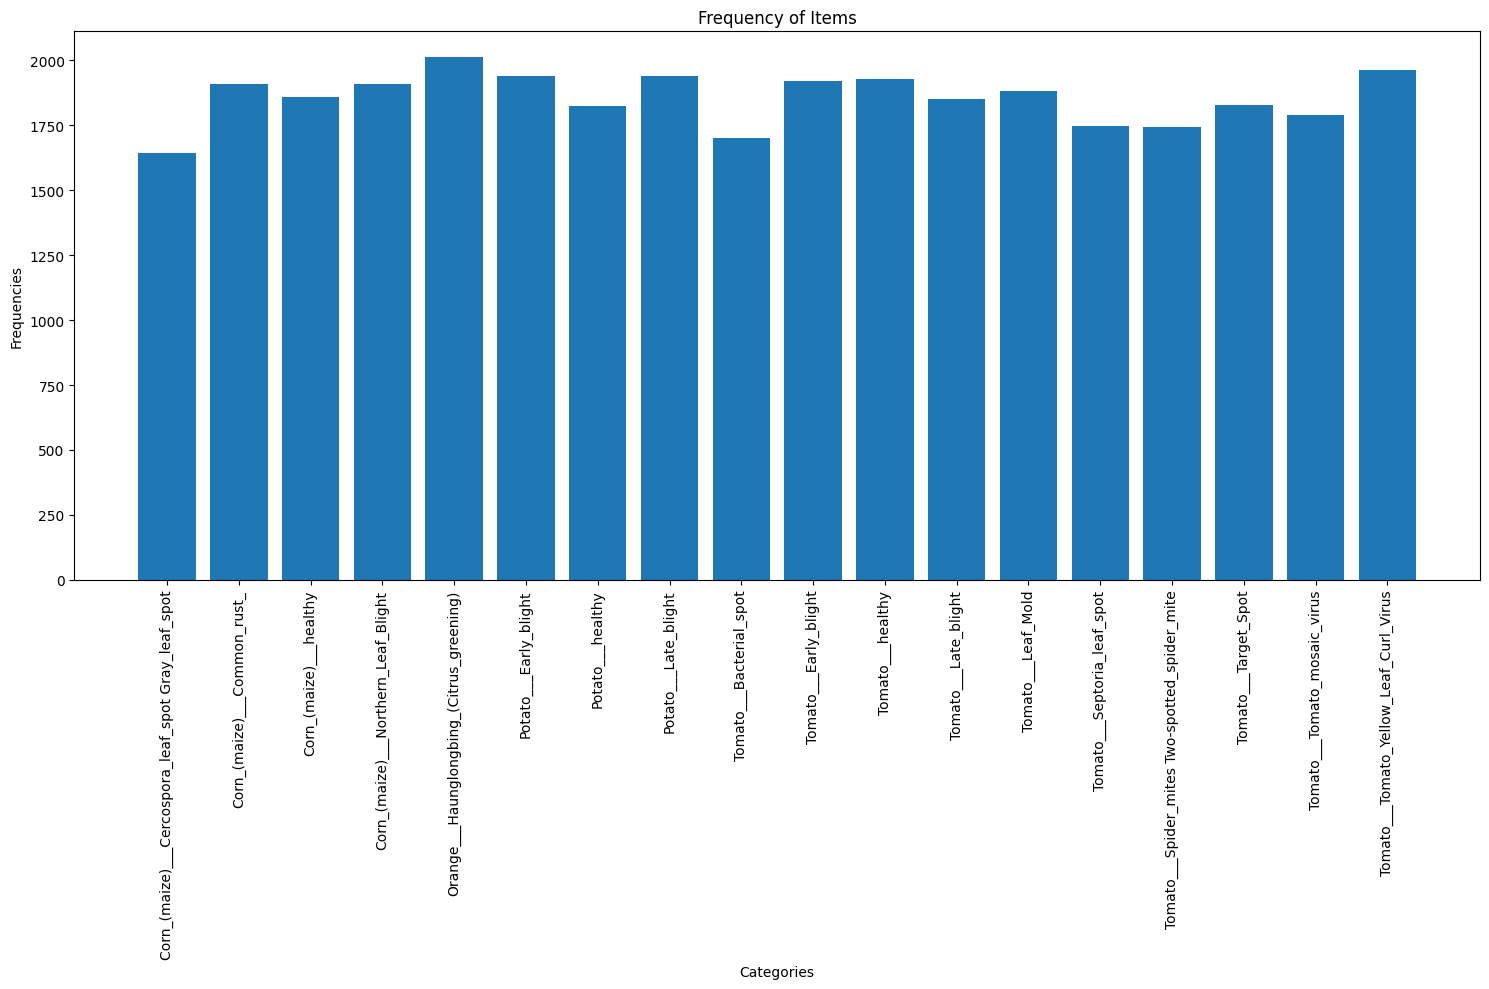

In [10]:
# Create a side bar chart
plt.figure(figsize=(15, 10))
plt.bar(cat_freq_df['Categories'], cat_freq_df['Frequencies'])
plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.title('Frequency of Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
# Determine the Fruits and vegetables that the dataset are about
fruits_veg = []
for cat in categories:
    fruits_veg.append(cat.split('___')[0])
unique_fruites_veg = list(np.unique(fruits_veg))

# Print the number of fruits and vegetables detected
print(f'The represents {len(unique_fruites_veg)} Different types of Fruits and Vegetables as follows : ')
unique_fruites_veg

The represents 4 Different types of Fruits and Vegetables as follows : 


['Corn_(maize)', 'Orange', 'Potato', 'Tomato']

In [12]:
# Create A dictionary shows how many class belongs to each veg or fruit
veg_fruite_cat = {}
for i in unique_fruites_veg:
    num = 0
    for j in categories:
        if i in j:
            num +=1
    veg_fruite_cat[i] = num
veg_fruite_cat

{'Corn_(maize)': 4, 'Orange': 1, 'Potato': 3, 'Tomato': 10}

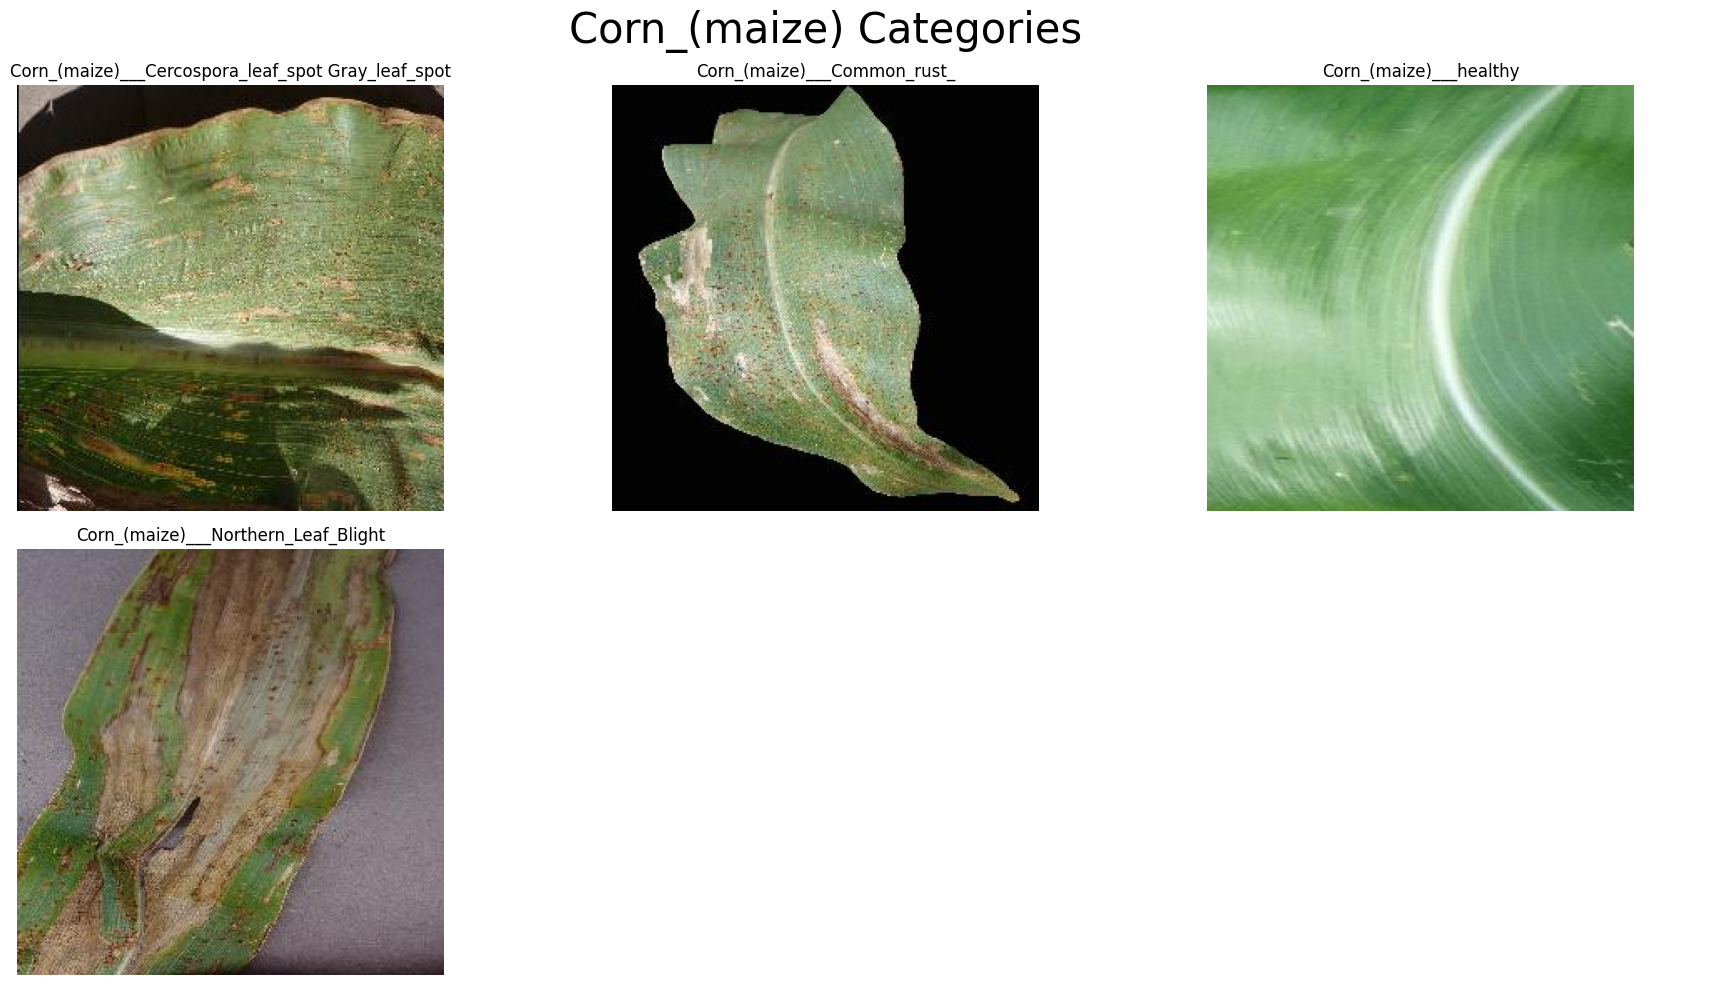

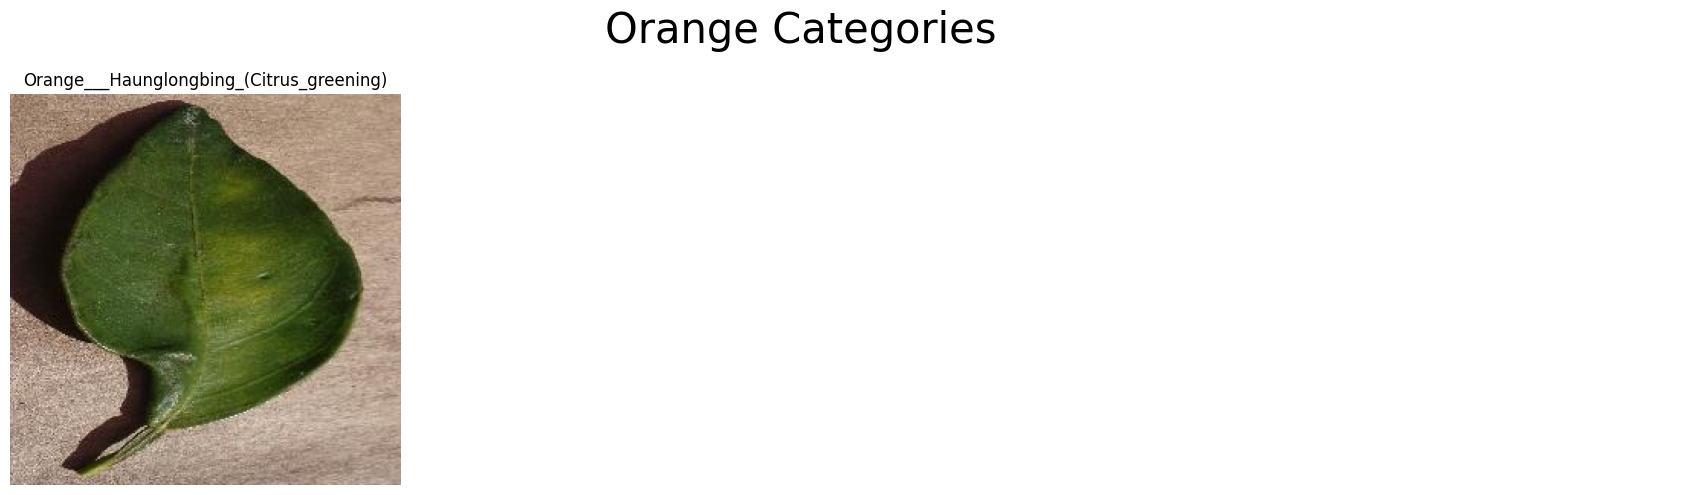

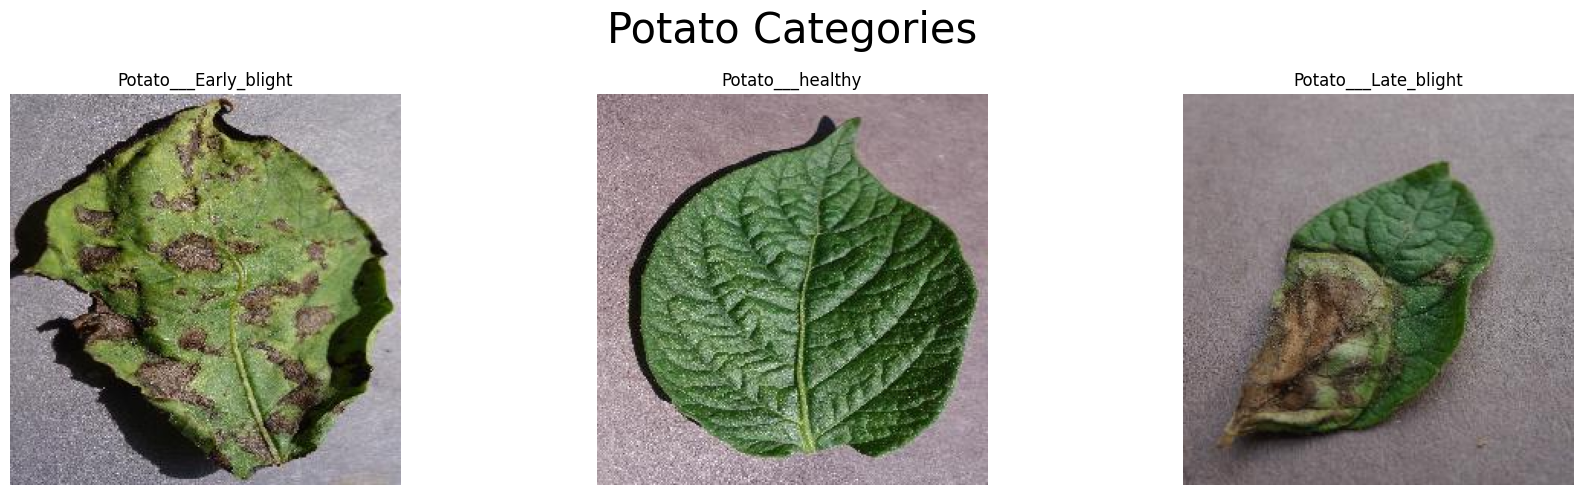

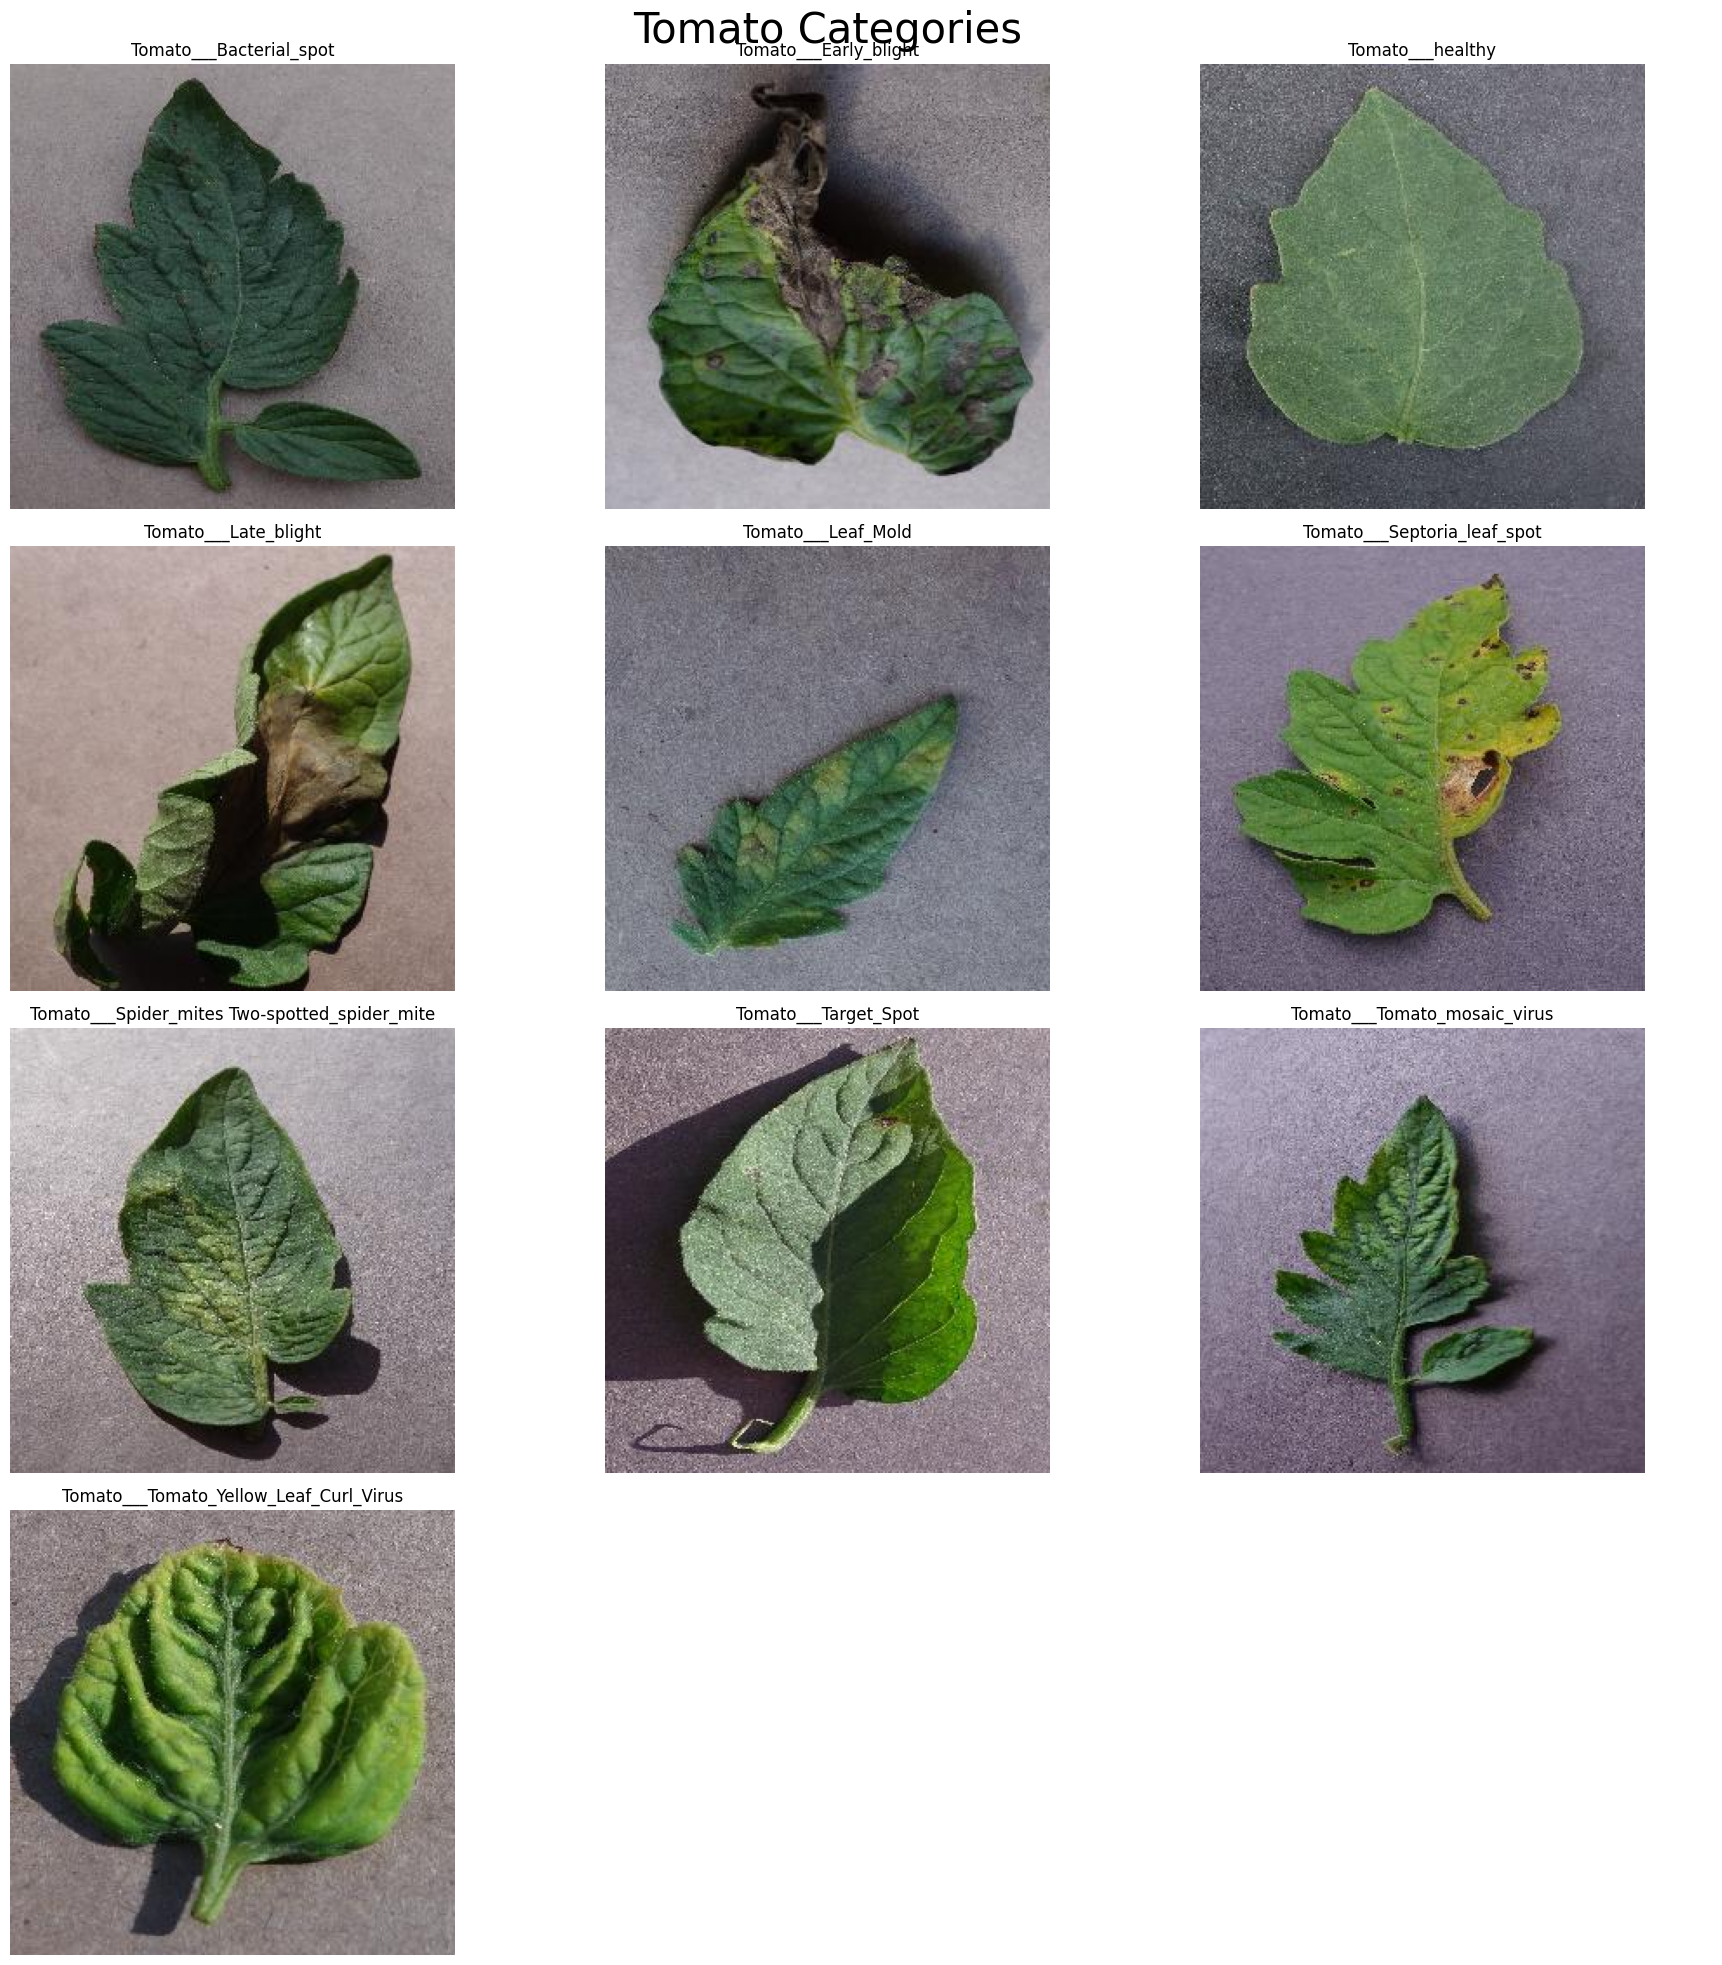

In [13]:
for i in veg_fruite_cat:
    
    # Define the num columns
    num_cols = 3

    # Calculate the number of rows required
    num_rows = int(np.ceil(veg_fruite_cat[i]/num_cols))

    # Create a figure for the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    axes = axes.flatten()
    fig.suptitle(f'{i} Categories',fontsize=30)
    plt_num = 0
    for j in categories:
    
        if i in j:
            # Construct the subcategory path
            subcategory_path = os.path.join(train_data_path, j)

            # Load a sample image from the subcategory
            sample_image = os.listdir(subcategory_path)[0]
            image_path = os.path.join(subcategory_path, sample_image)
            image = cv2.imread(image_path)


            # Convert the image from BGR to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
            # Plot the image
            ax = axes[plt_num]
            ax.imshow(image_rgb)
            ax.set_title(f'{j}')
            ax.axis('off')
            plt_num +=1
    # Hide any unused subplots
    for i in range(plt_num, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


In [11]:
# image_sizes = []

# # Iterate through each category and subcategory
# for i in categories:
#     # Construct the subcategory path
#     subcategory_path = os.path.join(train_data_path,i)
                                    
#     # List all images in the subcategory
#     image_files = os.listdir(subcategory_path)
#     for image_file in image_files:
#         # Load the image
#         image_path = os.path.join(subcategory_path, image_file)
#         image = cv2.imread(image_path)
#         if image is not None:
#             # Get the dimensions of the image
#             height, width, _ = image.shape
#             # Append the dimensions to the list
#             image_sizes.append((width, height))

# # Print the list of image sizes
# print(image_sizes)
## This shows that the dataset size is 256 * 256 * 3

# **Creating Workspace Structure**

In [12]:
content_path = '/kaggle/working/working_space/'
exported_model_path = content_path + 'exported-models/'

try:
    os.mkdir(content_path)
    print("Created workspace")
    
except FileExistsError :
    print("workspace directory already exists: creating rest of the structure inside workspace")

try:
    os.mkdir(exported_model_path)
    print("full directory structure creation done")
    
except FileExistsError :
    print("directory structure already exists: Will be using existing directories")


Created workspace
full directory structure creation done


# **Building the CNN Model**

In [15]:
# # Initialize TPU
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.TPUStrategy(resolver)

In [6]:
del model1

In [18]:
print(train_generator.class_indices)

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0, 'Corn_(maize)___Common_rust_': 1, 'Corn_(maize)___Northern_Leaf_Blight': 2, 'Corn_(maize)___healthy': 3, 'Orange___Haunglongbing_(Citrus_greening)': 4, 'Potato___Early_blight': 5, 'Potato___Late_blight': 6, 'Potato___healthy': 7, 'Tomato___Bacterial_spot': 8, 'Tomato___Early_blight': 9, 'Tomato___Late_blight': 10, 'Tomato___Leaf_Mold': 11, 'Tomato___Septoria_leaf_spot': 12, 'Tomato___Spider_mites Two-spotted_spider_mite': 13, 'Tomato___Target_Spot': 14, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 15, 'Tomato___Tomato_mosaic_virus': 16, 'Tomato___healthy': 17}


In [2]:
# with strategy.scope():
# Define the CNN model
input_shape = (256, 256, 3)  # Adjust according to your preprocessed image dimensions
num_classes = 4  # Number of classes in the New Plant Diseases Dataset

model1 = Sequential()

# Convolutional layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# Max Pooling layer
model1.add(MaxPooling2D(pool_size=(3, 3)))
# Convolutional layer
model1.add(Conv2D(64, (3, 3), activation='relu'))
# Max Pooling layer
model1.add(MaxPooling2D(pool_size=(3, 3)))

# Convolutional layer
model1.add(Conv2D(128, (3, 3), activation='relu'))
# Max Pooling layer
model1.add(MaxPooling2D(pool_size=(3, 3)))
model1.add(Dropout(0.2))

# Flatten layer
model1.add(Flatten())

# Dense layer
model1.add(Dense(256, activation='relu'))

# Dropout layer
model1.add(Dropout(0.5))

# Output layer
model1.add(Dense(num_classes, activation='softmax'))

In [3]:
# with strategy.scope():
# Compile the model with custom metrics
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy', 
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         

**Creating the Data Generators For Training**

In [4]:
processed_train_dir = "D:/smartindia/CornPrediction/corn_train"
processed_val_dir = "D:/smartindia/CornPrediction/corn_valid"

# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to [0, 1]
    
)

validation_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to [0, 1]
)


# Create data generators
train_generator = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(256, 256),  # Resize images to match model input  224*224
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    shuffle=True

)

validation_generator = validation_datagen.flow_from_directory(
    processed_val_dir,
    target_size=(256, 256),  # Resize images to match model input 224*224
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    shuffle=False
)

Found 7568 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.


In [6]:
# Train the model
history1 = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
237/237 [==============================] - 86s 361ms/step - loss: 0.0356 - accuracy: 0.9874 - precision: 0.9874 - recall: 0.9872 - val_loss: 0.1255 - val_accuracy: 0.9688 - val_precision: 0.9688 - val_recall: 0.9688
Epoch 2/10
237/237 [==============================] - 80s 339ms/step - loss: 0.0336 - accuracy: 0.9880 - precision: 0.9881 - recall: 0.9880 - val_loss: 0.2198 - val_accuracy: 0.9656 - val_precision: 0.9656 - val_recall: 0.9656
Epoch 3/10
237/237 [==============================] - 78s 329ms/step - loss: 0.0479 - accuracy: 0.9840 - precision: 0.9843 - recall: 0.9839 - val_loss: 0.1922 - val_accuracy: 0.9672 - val_precision: 0.9677 - val_recall: 0.9672
Epoch 4/10
237/237 [==============================] - 81s 343ms/step - loss: 0.0396 - accuracy: 0.9874 - precision: 0.9874 - recall: 0.9872 - val_loss: 0.1244 - val_accuracy: 0.9727 - val_precision: 0.9727 - val_recall: 0.9727
Epoch 5/10
237/237 [==============================] - 85s 358ms/step - loss: 0.0329 - accura

In [9]:
his=list[history]

In [10]:
his1=list[history1]

In [11]:
his.extend(his1)

TypeError: descriptor 'extend' for 'list' objects doesn't apply to a 'types.GenericAlias' object

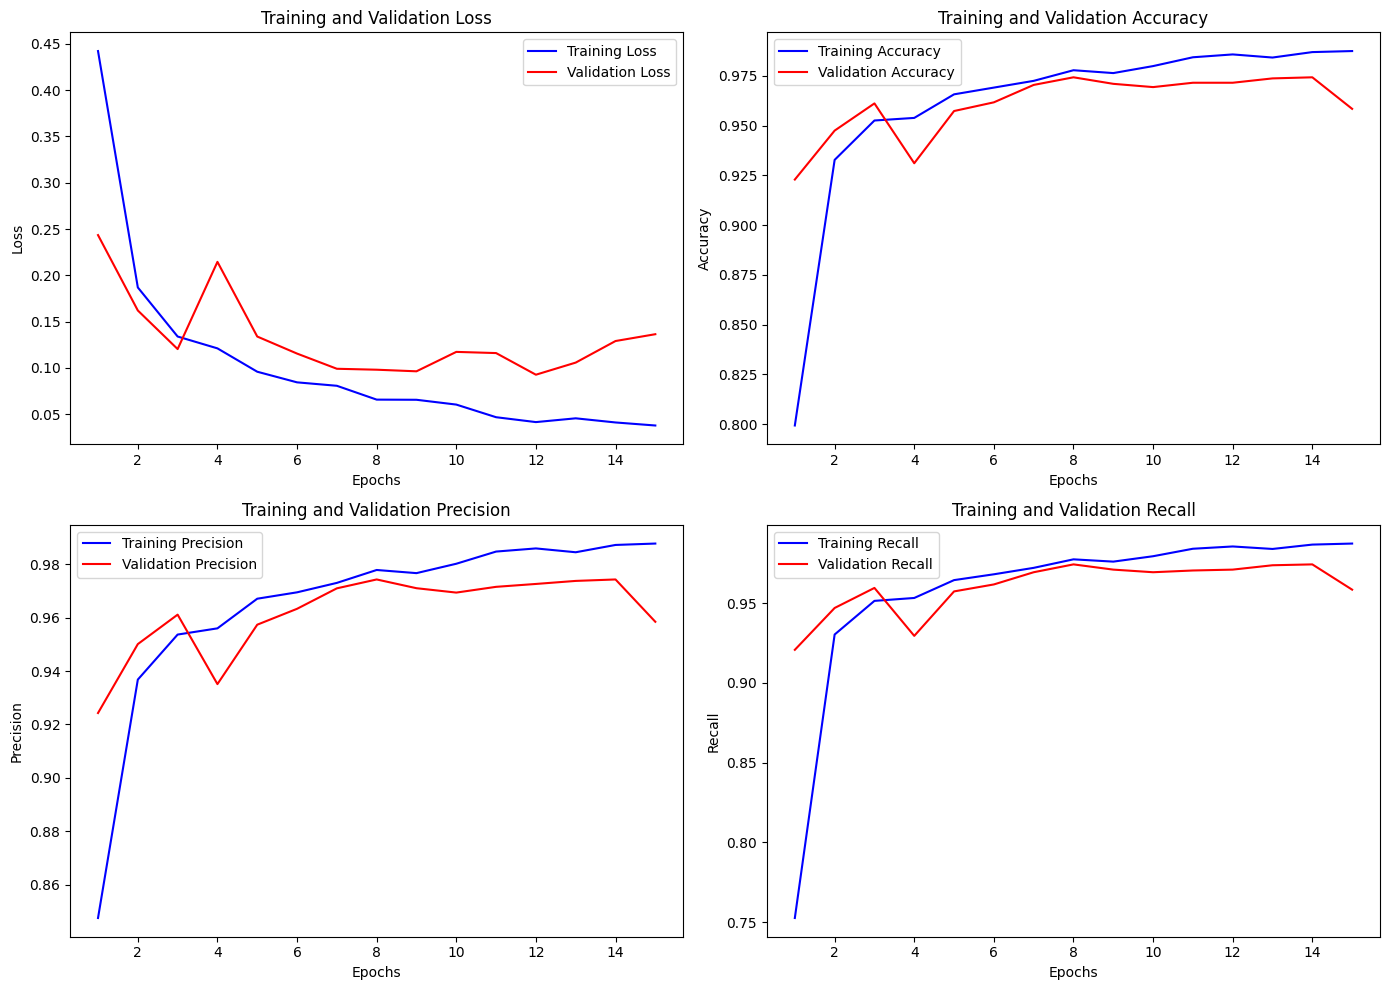

In [12]:
import matplotlib.pyplot as plt

# Extract the metrics from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Precision
plt.subplot(2, 2, 3)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot Recall
plt.subplot(2, 2, 4)
plt.plot(epochs, recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Save the trained model
model1.save('D:/cornprediction20.h5')

# **Loading the Saved Model And Make Predictions**

In [9]:
# Load the trained model
loaded_model = tf.keras.models.load_model('D:/plant_disease_cnn_model.h5', custom_objects={
    'precision': tf.keras.metrics.Precision(),
    'recall': tf.keras.metrics.Recall()
})

In [11]:
model1=loaded_model

58/58 [==============================] - 10s 128ms/step


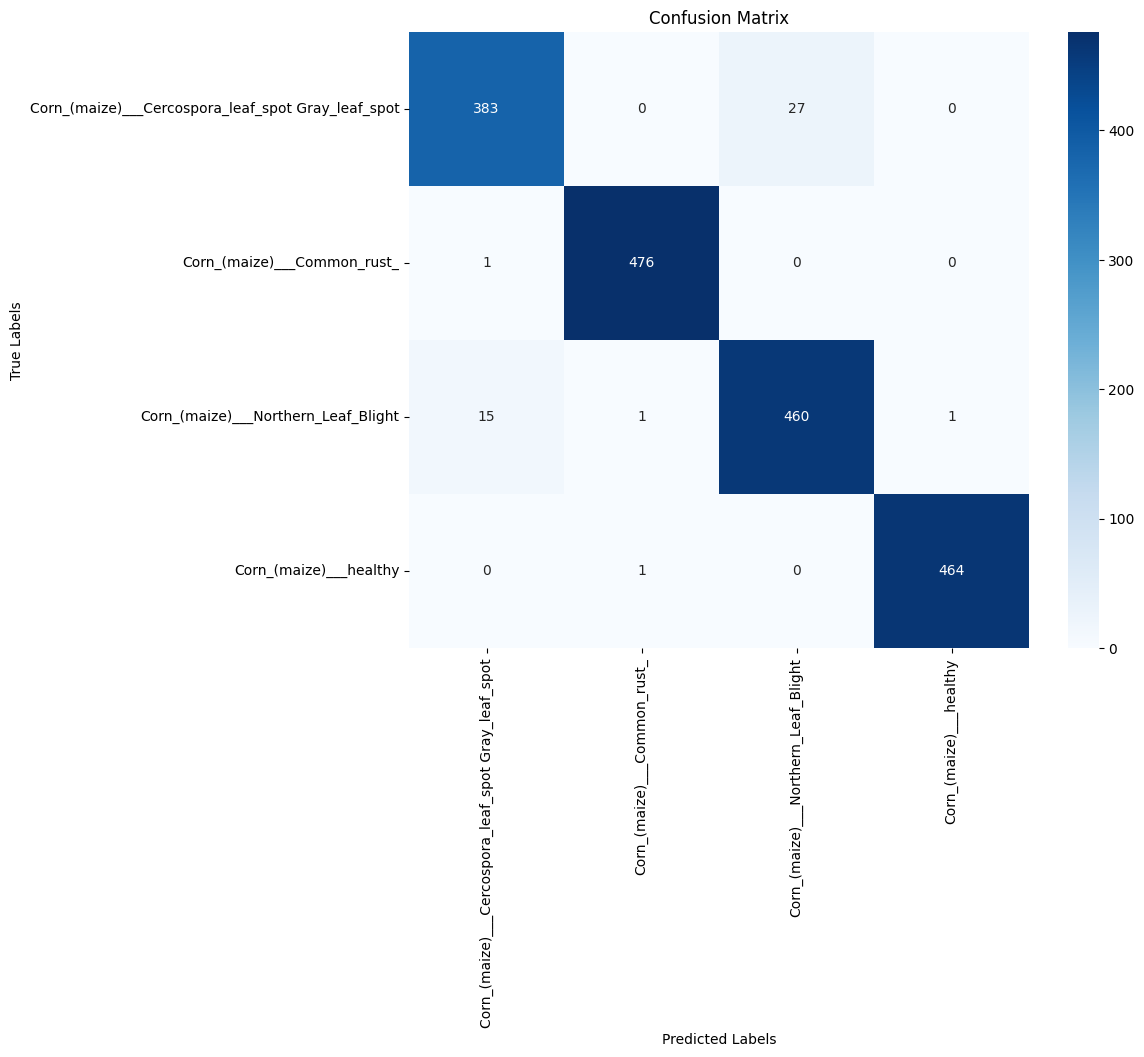

In [7]:
# Predict on validation data
validation_steps = validation_generator.n // validation_generator.batch_size
predictions = model1.predict(validation_generator, steps=validation_steps+1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Generate the classification report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

Classification Report:
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.93      0.95       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.95       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465

                                          accuracy                           0.97      1829
                                         macro avg       0.97      0.97      0.97      1829
                                      weighted avg       0.97      0.97      0.97      1829



In [9]:
# Directory containing test images
test_dir = "D:/smartindia/CornPrediction/corn_test" # Replace with the path to your test folder

# Get list of test images
test_images = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

# Print the List of test images
print(f'Test Folder contains {len(test_images)} as follows')
test_images

Test Folder contains 30 as follows


['Corn_(mai3ze)___Common_rust_.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot (2).JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot1.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot10.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot2.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot3.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot4.jpg',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot5.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot6.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot7.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot8.JPG',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot9.JPG',
 'Corn_(maize)___Common_rust_.JPG',
 'Corn_(maize)___Common_rust_2.JPG',
 'Corn_(maize)___Common_rust_4.JPG',
 'Corn_(maize)___Common_rust_5.JPG',
 'Corn_(maize)___Common_rust_6.JPG',
 'Corn_(maize)___Common_rust_8.JPG',
 'Corn_(maize)___Co

In [22]:
validation_generator.class_indices.keys()

dict_keys(['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy'])

In [10]:
def preprocess_image(image_path):
    image = skimage.io.imread(image_path)    
    image_array = np.array(image) / 255.0  # Normalize to [0,1]
    return np.expand_dims(image_array, axis=0)  # Add batch dimension

In [11]:
# Dictionary to hold the results
results = {}

# Iterate over the test images and make predictions
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = preprocess_image(img_path)
    
    # Predict the class
    predictions = model1.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Store the result
    results[img_name] = predicted_class


1/1 [==============================] - 0s 15ms/step


In [19]:
print(np.argmax(predictions,axis=1)[0])

2


In [12]:
# Print the results
for img_name, predicted_class in results.items():
    print(f"Image: {img_name}, Predicted Class: {predicted_class}")

Image: Corn_(mai3ze)___Common_rust_.JPG, Predicted Class: 1
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot (2).JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot1.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot10.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot2.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot3.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot4.jpg, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot5.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot6.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot7.JPG, Predicted Class: 0
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot8.JPG, Predicted Class: 0
Image: Corn_(maize)___Ce

In [21]:
# Get the class indices mapping from the training generator
class_indices = train_generator.class_indices
# Reverse the class indices to get the category names from class index
class_indices = {v: k for k, v in class_indices.items()}

# Update results to include the category names
results = {img_name: class_indices[predicted_class] for img_name, predicted_class in results.items()}

# Print the results with category names
for img_name, predicted_category in results.items():
    print(f"Image: {img_name}, Predicted Category: {predicted_category}")


Image: Corn_(mai3ze)___Common_rust_.JPG, Predicted Category: Corn_(maize)___Common_rust_
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot (2).JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot1.JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot10.JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot2.JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot3.JPG, Predicted Category: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Image: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot4.jpg, Predicted Category: Corn_(maize)__

In [ ]:
def preprocess_image(image_path):
    image = skimage.io.imread(image_path)    
    image_array = np.array(image) / 255.0  # Normalize to [0,1]
    return np.expand_dims(image_array, axis=0) 

In [69]:
# Create the DataFrame
df = pd.DataFrame(list(results.items()), columns=['The True Class', 'The Predicted Class'])
df

The True Class                     The Predicted Class
0          CornCommonRust1.JPG             Corn_(maize)___Common_rust_
1          CornCommonRust2.JPG             Corn_(maize)___Common_rust_
2          CornCommonRust3.JPG             Corn_(maize)___Common_rust_
3       PotatoEarlyBlight1.JPG                   Potato___Early_blight
4       PotatoEarlyBlight2.JPG                   Potato___Early_blight
5       PotatoEarlyBlight3.JPG                   Potato___Early_blight
6       PotatoEarlyBlight4.JPG                   Potato___Early_blight
7       PotatoEarlyBlight5.JPG                   Potato___Early_blight
8           PotatoHealthy1.JPG                        Potato___healthy
9           PotatoHealthy2.JPG                        Potato___healthy
10      TomatoEarlyBlight1.JPG                   Tomato___Early_blight
11     TomatoEarlyBlight19.jpg                   Tomato___Early_blight
12      TomatoEarlyBlight2.JPG                   Tomato___Early_blight
13      TomatoEarlyBlight3.JPG                   Tomato___Early_blight
14      TomatoEarlyBlight4.JPG                   Tomato___Early_blight
15      TomatoEarlyBlight5.JPG                   Tomato___Early_blight
16      TomatoEarlyBlight6.JPG                   Tomato___Early_blight
17          TomatoHealthy1.JPG                        Tomato___healthy
18          TomatoHealthy2.JPG                        Tomato___healthy
19          TomatoHealthy3.JPG                        Tomato___healthy
20          TomatoHealthy4.JPG                        Tomato___healthy
21  TomatoYellowCurlVirus1.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
22  TomatoYellowCurlVirus2.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
23  TomatoYellowCurlVirus3.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
24  TomatoYellowCurlVirus4.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
25  TomatoYellowCurlVirus5.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus
26  TomatoYellowCurlVirus6.JPG  Tomato___Tomato_Yellow_Leaf_Curl_Virus

In [ ]:
# Get the class indices mapping from the training generator
class_indices = train_generator.class_indices
# Reverse the class indices to get the category names from class index
class_indices = {v: k for k, v in class_indices.items()}

# Predict and plot one image
image_name = test_images[0]  # Select the first image for demonstration
image_path = os.path.join(test_dir, image_name)
preprocessed_image = preprocess_image(image_path)

# Make prediction
predictions = model.predict(preprocessed_image)
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class = class_indices[predicted_class_idx]

In [ ]:
{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}